✅ Found CSV file: /home/jberg/OneDrive/Data_collection_Himalaya/streamflow/streamflow_arthur.csv
Processing Arthur streamflow file: streamflow_arthur.csv
Date range: 1966-01-01 00:00:00 to 2015-12-31 00:00:00
Total rows with valid dates: 18262

Processing station: Dainyor bridge (ID: 0102)
✅ Saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0102.csv
   Records: 18262
   Valid data: 14975
   Missing data: 3287


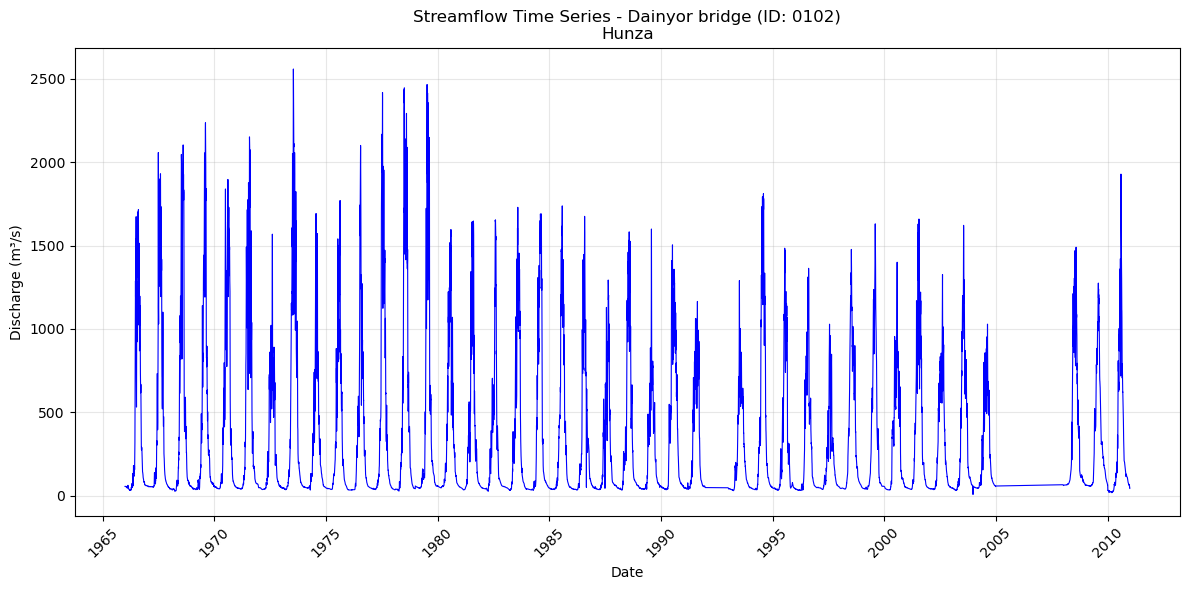

   📊 Plot saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0102_plot.png

Processing station: Turkeghat (ID: 0604)
✅ Saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0604.csv
   Records: 18262
   Valid data: 3621
   Missing data: 14641


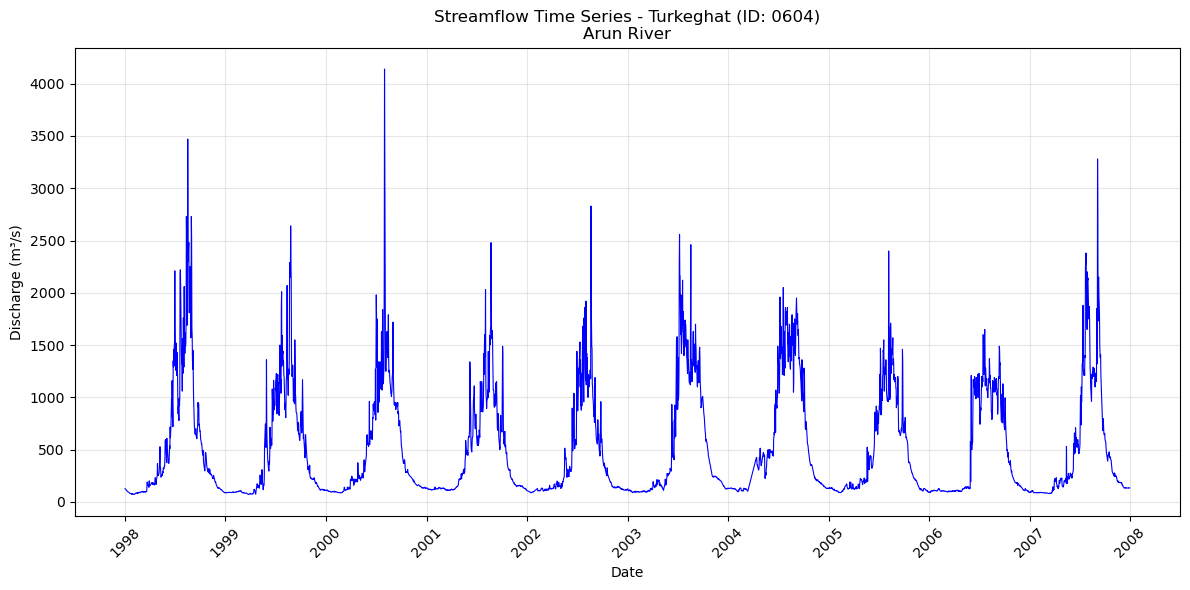

   📊 Plot saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0604_plot.png

Processing station: Pachuwarghat (ID: 0630)
✅ Saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0630.csv
   Records: 18262
   Valid data: 3652
   Missing data: 14610


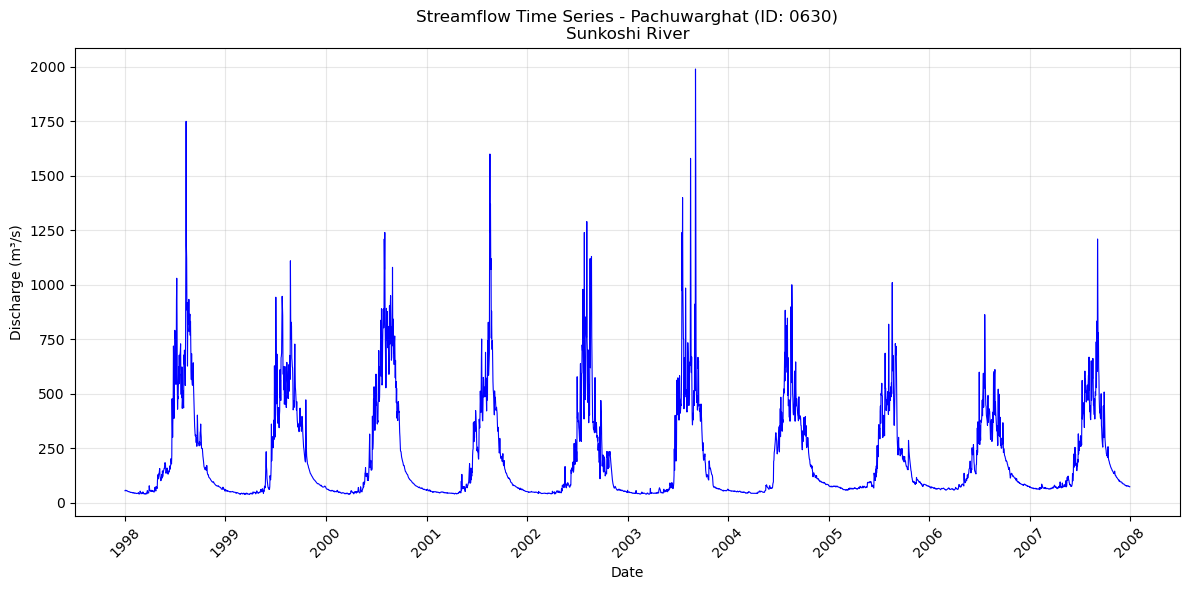

   📊 Plot saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0630_plot.png

Processing station: Khurkot (ID: 0652)
✅ Saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0652.csv
   Records: 18262
   Valid data: 3273
   Missing data: 14989


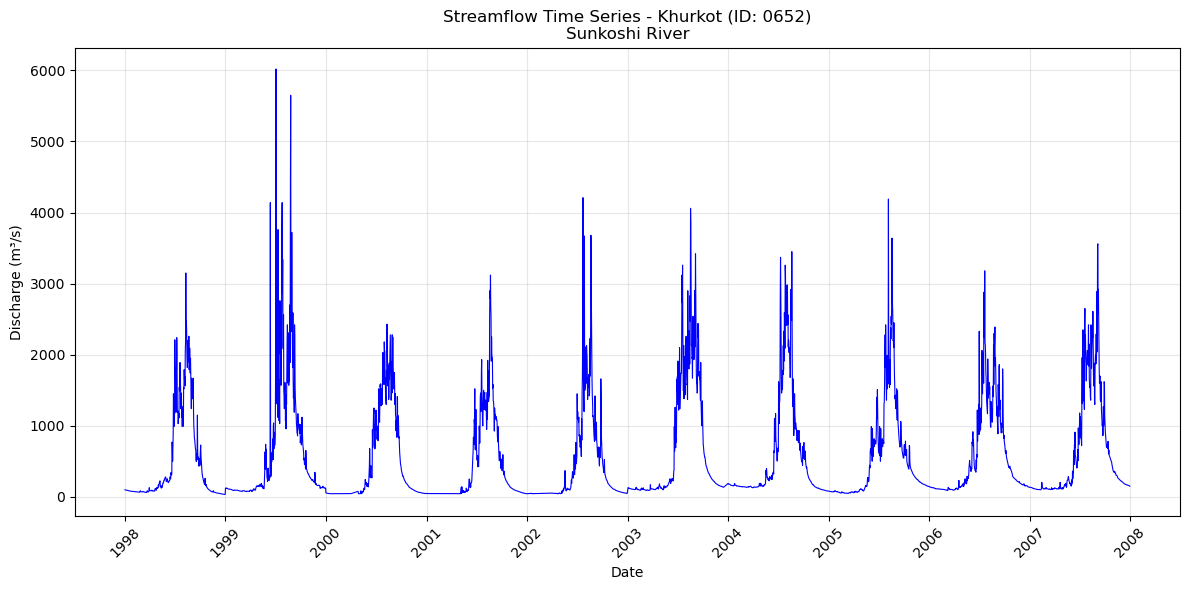

   📊 Plot saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0652_plot.png

Processing station: Mulghat (ID: 0690)
✅ Saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0690.csv
   Records: 18262
   Valid data: 3518
   Missing data: 14744


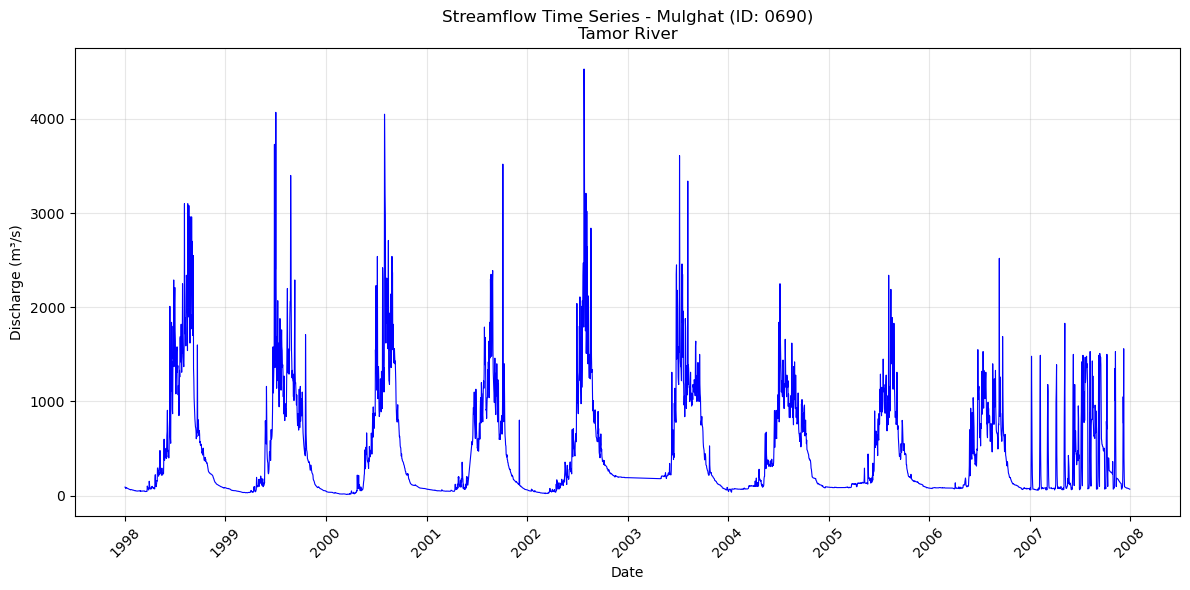

   📊 Plot saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0690_plot.png

Processing station: Chatara (ID: 0695)
✅ Saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0695.csv
   Records: 18262
   Valid data: 3652
   Missing data: 14610


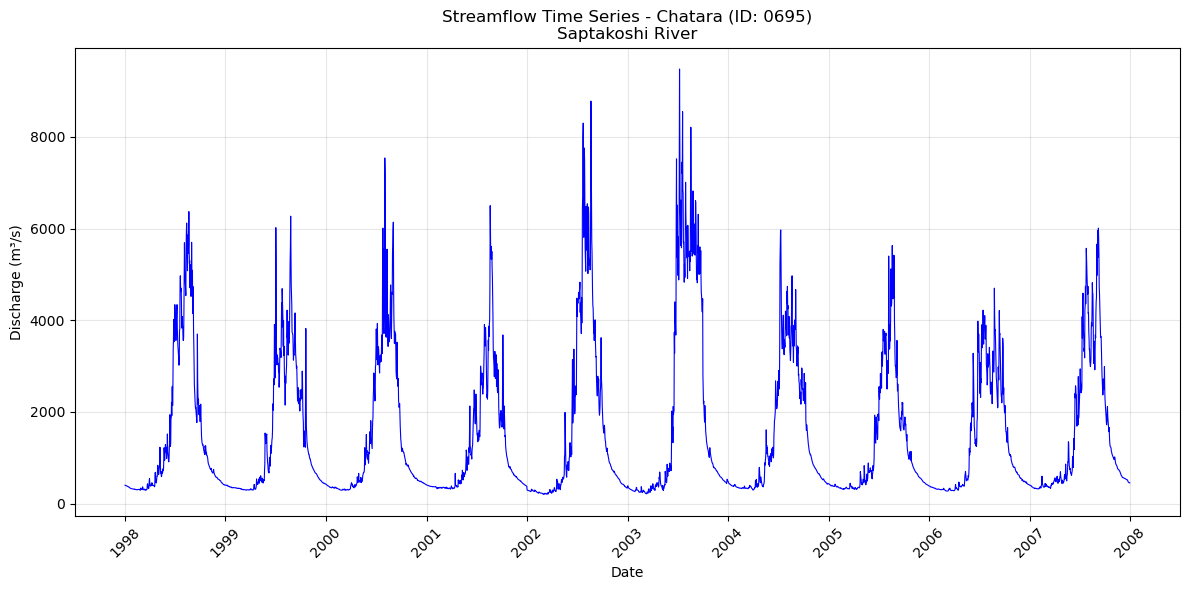

   📊 Plot saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0695_plot.png

Processing station: Wangdi Rapids (ID: 0201)
✅ Saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0201.csv
   Records: 18262
   Valid data: 6209
   Missing data: 12053


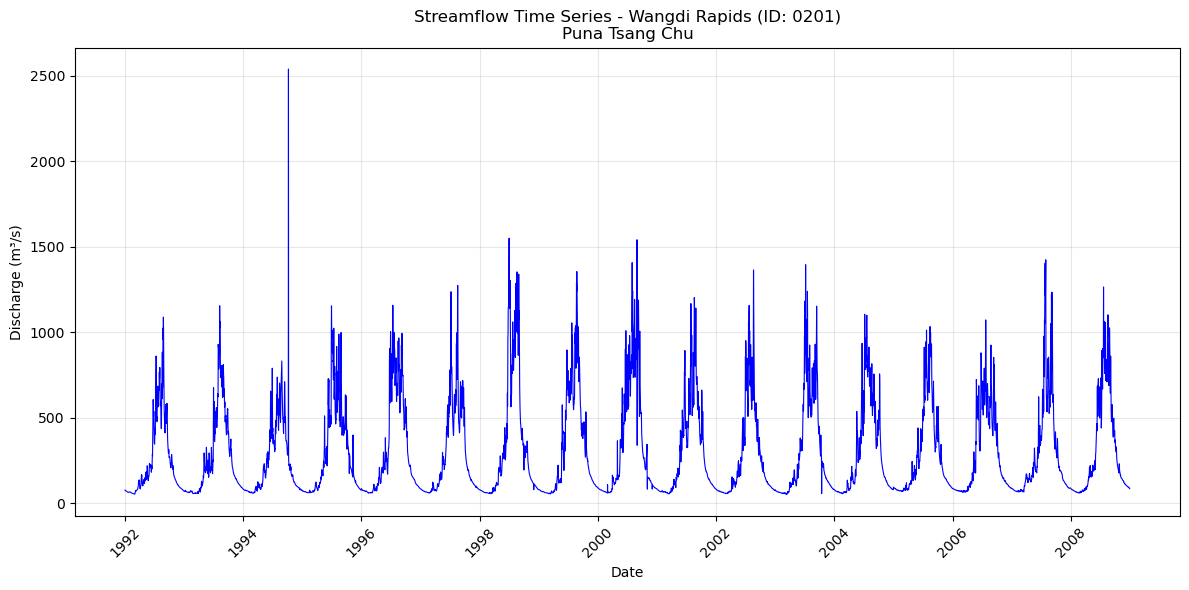

   📊 Plot saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0201_plot.png

Processing station: Bimalnagar (ID: 0439)
✅ Saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0439.csv
   Records: 18262
   Valid data: 9190
   Missing data: 9072


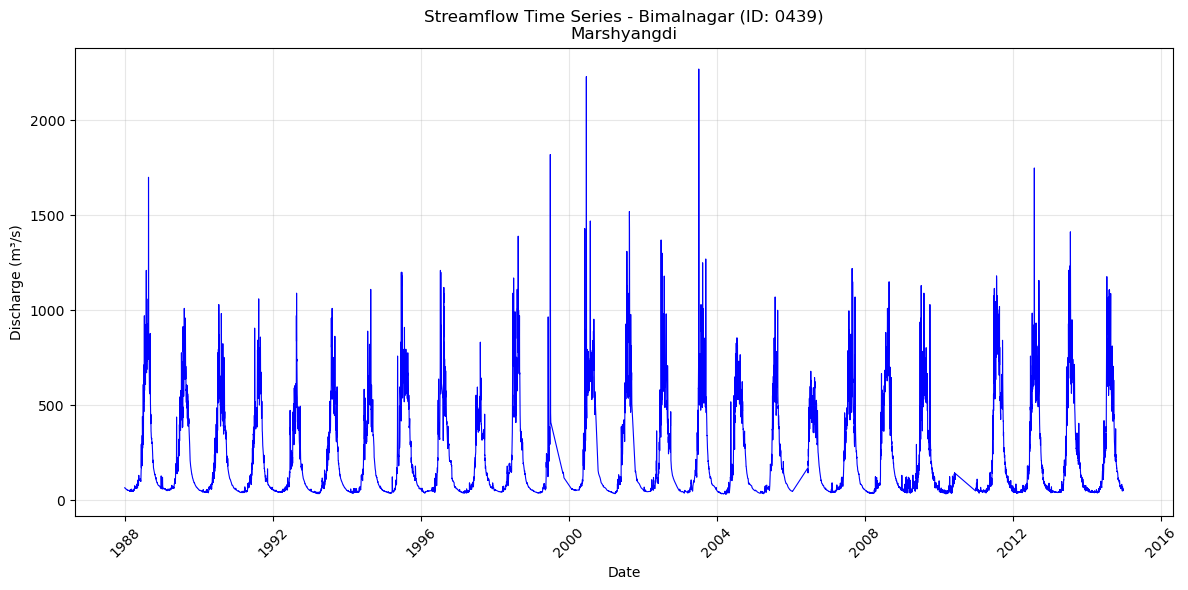

   📊 Plot saved: /home/jberg/OneDrive/Raven_worldwide/01_data/streamflow/streamflow_0439_plot.png

Processing complete!
Successfully processed: 8 stations
Failed: 0 stations
Total stations processed: 8

SUMMARY OF ALL PROCESSED ARTHUR STATIONS
Station 0102 (Dainyor bridge       | Hunza               ): 14975/18262 records ( 82.0% complete) | 1966-01-01 to 2015-12-31
Station 0604 (Turkeghat            | Arun River          ):  3621/18262 records ( 19.8% complete) | 1966-01-01 to 2015-12-31
Station 0630 (Pachuwarghat         | Sunkoshi River      ):  3652/18262 records ( 20.0% complete) | 1966-01-01 to 2015-12-31
Station 0652 (Khurkot              | Sunkoshi River      ):  3273/18262 records ( 17.9% complete) | 1966-01-01 to 2015-12-31
Station 0690 (Mulghat              | Tamor River         ):  3518/18262 records ( 19.3% complete) | 1966-01-01 to 2015-12-31
Station 0695 (Chatara              | Saptakoshi River    ):  3652/18262 records ( 20.0% complete) | 1966-01-01 to 2015-12-31
Statio

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime

def process_arthur_streamflow(csv_file, output_folder, plot=True):
    """
    Process Arthur streamflow CSV file and save daily time series for selected gauges.
    
    Parameters:
    csv_file (str): Path to the Arthur CSV file
    output_folder (str): Path to folder where CSV files will be saved
    plot (bool): Whether to create time series plots for each gauge
    
    Returns:
    dict: Dictionary with gauge_id as key and processed DataFrame as value
    """
    # Mapping: column number -> (station, river, gauge_id) - ALL 4 DIGITS
    mapping = {
        1: ('Dainyor bridge', 'Hunza', '0102'),
        2: ('Turkeghat', 'Arun River', '0604'),
        4: ('Pachuwarghat', 'Sunkoshi River', '0630'),
        5: ('Khurkot', 'Sunkoshi River', '0652'),
        7: ('Mulghat', 'Tamor River', '0690'),
        8: ('Chatara', 'Saptakoshi River', '0695'),
        9: ('Wangdi Rapids', 'Puna Tsang Chu', '0201'),
        10: ('Bimalnagar', 'Marshyangdi', '0439')
    }

    print(f"Processing Arthur streamflow file: {os.path.basename(csv_file)}")
    
    df = pd.read_csv(csv_file)
    if 'date' not in df.columns:
        raise ValueError("First column must be 'date'.")

    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df = df.dropna(subset=['date'])
    
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"Total rows with valid dates: {len(df)}")

    os.makedirs(output_folder, exist_ok=True)
    
    results = {}
    successful = 0
    failed = 0

    for col_num, (station, river, gauge_id) in mapping.items():
        col_name = str(col_num)
        
        print(f"\nProcessing station: {station} (ID: {gauge_id})")
        
        if col_name not in df.columns:
            print(f"   ❌ Column {col_name} not found, skipping {station}")
            failed += 1
            continue

        try:
            station_df = df[['date', col_name]].copy()
            station_df.columns = ['date', 'Q_obs']
            station_df['Q_obs'] = pd.to_numeric(station_df['Q_obs'], errors='coerce')

            # Sort by date
            station_df = station_df.sort_values('date').reset_index(drop=True)

            # Create complete date range and fill missing values
            if len(station_df) > 0:
                date_range = pd.date_range(start=station_df['date'].min(), 
                                         end=station_df['date'].max(), 
                                         freq='D')
                station_df = station_df.set_index('date').reindex(date_range).reset_index()
                station_df.columns = ['date', 'Q_obs']
            
            # Save to CSV with 4-digit gauge_id
            out_file = os.path.join(output_folder, f"streamflow_{gauge_id}.csv")
            station_df.to_csv(out_file, index=False)
            
            print(f"✅ Saved: {out_file}")
            print(f"   Records: {len(station_df)}")
            print(f"   Valid data: {len(station_df.dropna(subset=['Q_obs']))}")
            print(f"   Missing data: {len(station_df) - len(station_df.dropna(subset=['Q_obs']))}")
            
            # Create plot if requested
            if plot and len(station_df) > 0:
                plt.figure(figsize=(12, 6))
                
                # Only plot non-NaN values
                plot_data = station_df.dropna(subset=['Q_obs']).copy()
                
                if len(plot_data) > 0:
                    plt.plot(plot_data['date'], plot_data['Q_obs'], 'b-', linewidth=0.8)
                    plt.title(f'Streamflow Time Series - {station} (ID: {gauge_id})\n{river}')
                    plt.xlabel('Date')
                    plt.ylabel('Discharge (m³/s)')
                    plt.grid(True, alpha=0.3)
                    plt.xticks(rotation=45)
                    plt.tight_layout()
                    
                    # Save plot with 4-digit gauge_id
                    plot_file = os.path.join(output_folder, f"streamflow_{gauge_id}_plot.png")
                    plt.savefig(plot_file, dpi=300, bbox_inches='tight')
                    plt.show()
                    
                    print(f"   📊 Plot saved: {plot_file}")
                else:
                    print(f"   ⚠️ No valid data to plot for {station}")
            
            # Store in results
            results[gauge_id] = station_df
            successful += 1
            
        except Exception as e:
            print(f"❌ Error processing station {station}: {str(e)}")
            failed += 1

    print(f"\n" + "="*60)
    print(f"Processing complete!")
    print(f"Successfully processed: {successful} stations")
    print(f"Failed: {failed} stations")
    print(f"Total stations processed: {len(results)}")
    
    return results


def get_arthur_summary(results):
    """
    Create a summary of all processed Arthur stations
    """
    if not results:
        print("No data to summarize")
        return
    
    # Reverse mapping for display - ALL 4 DIGITS
    id_to_info = {
        '0102': ('Dainyor bridge', 'Hunza'),
        '0604': ('Turkeghat', 'Arun River'),
        '0630': ('Pachuwarghat', 'Sunkoshi River'),
        '0652': ('Khurkot', 'Sunkoshi River'),
        '0690': ('Mulghat', 'Tamor River'),
        '0695': ('Chatara', 'Saptakoshi River'),
        '0201': ('Wangdi Rapids', 'Puna Tsang Chu'),
        '0439': ('Bimalnagar', 'Marshyangdi')
    }
    
    print(f"\n" + "="*100)
    print(f"SUMMARY OF ALL PROCESSED ARTHUR STATIONS")
    print(f"="*100)
    
    total_records = 0
    total_valid = 0
    
    for gauge_id, df in results.items():
        valid_data = len(df.dropna(subset=['Q_obs']))
        total_data = len(df)
        total_records += total_data
        total_valid += valid_data
        
        station_name, river = id_to_info.get(gauge_id, ('Unknown', 'Unknown'))
        
        if total_data > 0:
            completeness = (valid_data / total_data) * 100
            date_range = f"{df['date'].min().strftime('%Y-%m-%d')} to {df['date'].max().strftime('%Y-%m-%d')}"
            print(f"Station {gauge_id} ({station_name:20s} | {river:20s}): {valid_data:5d}/{total_data:5d} records ({completeness:5.1f}% complete) | {date_range}")
        else:
            print(f"Station {gauge_id} ({station_name:20s} | {river:20s}): No data")
    
    print(f"="*100)
    print(f"TOTALS: {total_valid:,} valid records out of {total_records:,} total records")
    print(f"Overall completeness: {(total_valid/total_records)*100:.1f}%")


# Example usage:
csv_file = "/home/jberg/OneDrive/Data_collection_Himalaya/streamflow/streamflow_arthur.csv"
output_folder = "/home/jberg/OneDrive/Raven_worldwide/01_data/streamflow"

if os.path.exists(csv_file):
    print(f"✅ Found CSV file: {csv_file}")
    
    # Process the Arthur streamflow data with plotting
    arthur_results = process_arthur_streamflow(csv_file, output_folder, plot=True)
    
    # Create summary
    get_arthur_summary(arthur_results)
    
else:
    print(f"❌ CSV file not found: {csv_file}")
    print("Please check the file path and make sure the file exists.")